**PROJETO BIG DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS
import pandas as pd

In [ ]:
# CARREGANDO DOCUMENTO NUM DATAFRAME
df_principal = pd.read_csv(r'/content/drive/MyDrive/Air_Traffic_Passenger_Statistics.csv')

In [ ]:
#CRIANDO COPIA DO DATAFRAME

df_1 = df_principal.copy()
df_1.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


# A CONHECER O DATAFRAME- LIMPEZA E PRE PROCESSAMENTO

In [ ]:
# TAMANHO
df_1.shape

(15007, 16)

01. A primeira tarefa que realizaremos, consistirá em saber quais os nossos tipos de dados. Para isso, teremos de os categorizar, de acordo com a sua estrutura:

In [ ]:
# INFORMAÇOES GERAIS DO DATAFRAME

print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [ ]:
# VERIFICANDO VALORES MISSING

df_1.isna().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [ ]:
# PORCENTAGEM VALORES MISSING

missing_porcentage = (df_1.isnull().sum() / len(df_1)) * 100

print(missing_porcentage)

Activity Period                0.000000
Operating Airline              0.000000
Operating Airline IATA Code    0.359832
Published Airline              0.000000
Published Airline IATA Code    0.359832
GEO Summary                    0.000000
GEO Region                     0.000000
Activity Type Code             0.000000
Price Category Code            0.000000
Terminal                       0.000000
Boarding Area                  0.000000
Passenger Count                0.000000
Adjusted Activity Type Code    0.000000
Adjusted Passenger Count       0.000000
Year                           0.000000
Month                          0.000000
dtype: float64


Como os valores missing representam menos de 1% do total de registros e se concentram apenas nas colunas Operating Airline IATA Code e PUblished Airline IATA Code. Vamos eliminá las.

In [ ]:
# VERIFICANDO OS CODIGOS DAS COMPANHIAS AEREAS

print(df_1['Operating Airline IATA Code'].unique())

['TZ' 'AC' 'CA' 'AF' 'NZ' 'FL' 'AS' 'NH' 'AA' 'MQ' 'OZ' 'EV' '4T' 'BA'
 'CX' 'CI' 'DL' 'BR' 'F9' 'HA' 'QX' 'FI' 'DH' 'JL' 'KL' 'KE' 'LH' 'YV'
 'MX' 'YX' 'NW' 'PR' 'SQ' 'OO' 'SY' 'TA' 'US ' 'UA' 'VS' 'WS' nan 'GL'
 'QK' 'QF' 'A8' 'NK' 'XP' 'EZ' 'AM' 'B6' 'XE' 'WN' 'VX' 'EI' 'G4' '9W'
 'BBB' 'EK' 'XJ' 'WO' 'AB' 'RW' 'LX' 'LP' 'SE' 'MU' 'SK' '5Y' 'CP' 'EY'
 'CZ' 'TK' 'CM' 'AI']


In [ ]:
# VERIFICAR DUPLICADOS

duplicates = df_1[df_1.duplicated()]
duplicates.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month


LIMPEZA DOS DADOS

In [ ]:
# ELIMINANDO AS COLUNAS 'Operating Airline IATA Code' e 'Published Airline IATA Code'

df_1.drop(['Operating Airline IATA Code','Published Airline IATA Code'],axis=1,inplace=True)

In [ ]:
# RENOMEANDO AS COLUNAS PARA DIFERENCIA LAS DO DATAFRAME ORIGINAL

for i in df_1.columns:
    novo_nome=str(df_1.columns.get_loc(i)+1)+'_'+i
    df_1.rename(columns={i:novo_nome},inplace=True)

In [ ]:
# CONVERTENDO 1_Activity Period PARA TIPO datetime MM-YYYY

df_1['1_Activity Period']= pd.to_datetime(df_1['1_Activity Period'],format='%Y%m').dt.to_period('M')
df_1.head()

,1_Activity Period,2_Operating Airline,3_Published Airline,4_GEO Summary,5_GEO Region,6_Activity Type Code,7_Price Category Code,8_Terminal,9_Boarding Area,10_Passenger Count,11_Adjusted Activity Type Code,12_Adjusted Passenger Count,13_Year,14_Month
0,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,2005-07,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,2005-07,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [ ]:
# VISUALIZAÇÃO DO NÚMERO DE REGISTROS POR COMPANHIA AEREA SEM RESTRIÇÃO

op_air=pd.DataFrame(df_1['2_Operating Airline'].value_counts()).sort_index(axis=0)
pd.set_option('display.max_rows', None)
op_air

,2_Operating Airline
ATA Airlines,44
Aer Lingus,98
Aeromexico,180
Air Berlin,36
Air Canada,366
Air Canada Jazz,14
Air China,259
Air France,258
Air India Limited,8
Air New Zealand,259


Temos 2 companhias aereas United Airline e United Airline Pre 07/01/2013. Vamos verificar os registros

In [ ]:
# Verificando a existencia de registros posteriores 2013 para United Airlines- Pre 07/01/2013

df_1[['13_Year','2_Operating Airline']][(df_1['2_Operating Airline']=='United Airlines - Pre 07/01/2013') & (df_1['13_Year']>2013)]

,13_Year,2_Operating Airline


In [ ]:
# REGISTROS COLUNA 6_Activity Type Code

print(df_1['6_Activity Type Code'].unique())

['Deplaned' 'Enplaned' 'Thru / Transit']


In [ ]:
# REGISTROS COLUNA  11_Adjusted Activity Type Code

print(df_1['11_Adjusted Activity Type Code'].unique())

['Deplaned' 'Enplaned' 'Thru / Transit * 2']


In [ ]:
# MODIFICAÇÃO DAS COLUNAS 11_Adjusted Activity Type Code Thru / Transit * 2

df_1['6_Activity Type Code'] = df_1['6_Activity Type Code'].str.replace(" / ", ' ', regex=False)
df_1['11_Adjusted Activity Type Code'] = df_1['11_Adjusted Activity Type Code'].str.replace(" / ",' ', regex=False)
df_1['11_Adjusted Activity Type Code'] = df_1['11_Adjusted Activity Type Code'].str.replace(" * ",' ', regex=False)

In [ ]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype    
---  ------                          --------------  -----    
 0   1_Activity Period               15007 non-null  period[M]
 1   2_Operating Airline             15007 non-null  object   
 2   3_Published Airline             15007 non-null  object   
 3   4_GEO Summary                   15007 non-null  object   
 4   5_GEO Region                    15007 non-null  object   
 5   6_Activity Type Code            15007 non-null  object   
 6   7_Price Category Code           15007 non-null  object   
 7   8_Terminal                      15007 non-null  object   
 8   9_Boarding Area                 15007 non-null  object   
 9   10_Passenger Count              15007 non-null  int64    
 10  11_Adjusted Activity Type Code  15007 non-null  object   
 11  12_Adjusted Passenger Count     15007 non-null  int64    
 12  13_Y

2. Com a interface utilizada durante as aulas teóricas, para trabalhar com a base de dados a
sua escolha, prepararemos a estrutura, bem como as tabelas necessárias para obter os
seguintes resultados. Teremos de inserir um conjunto de registos e mostrar os pedidos
detalhados seguidamente:

In [ ]:
# 2.1 Todos registros com valores Air China

df_1[df_1['2_Operating Airline'] == 'Air China']

,1_Activity Period,2_Operating Airline,3_Published Airline,4_GEO Summary,5_GEO Region,6_Activity Type Code,7_Price Category Code,8_Terminal,9_Boarding Area,10_Passenger Count,11_Adjusted Activity Type Code,12_Adjusted Passenger Count,13_Year,14_Month
5,2005-07,Air China,Air China,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,2005-07,Air China,Air China,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
120,2005-08,Air China,Air China,International,Asia,Deplaned,Other,International,G,4204,Deplaned,4204,2005,August
121,2005-08,Air China,Air China,International,Asia,Enplaned,Other,International,G,3923,Enplaned,3923,2005,August
238,2005-09,Air China,Air China,International,Asia,Deplaned,Other,International,G,4416,Deplaned,4416,2005,September
239,2005-09,Air China,Air China,International,Asia,Enplaned,Other,International,G,4568,Enplaned,4568,2005,September
357,2005-10,Air China,Air China,International,Asia,Deplaned,Other,International,G,4329,Deplaned,4329,2005,October
358,2005-10,Air China,Air China,International,Asia,Enplaned,Other,International,G,4715,Enplaned,4715,2005,October
477,2005-11,Air China,Air China,International,Asia,Deplaned,Other,International,G,4550,Deplaned,4550,2005,November
478,2005-11,Air China,Air China,International,Asia,Enplaned,Other,International,G,4149,Enplaned,4149,2005,November


In [ ]:
# 2.1. CONTAGEM DOS REGISTROS Air China
count_air_china = (df_1['2_Operating Airline']== 'Air China').sum()
count_air_china

259

In [ ]:
# 2.2)  Obter todos os voos da companhia aérea "Air Berlin", cujo embarque foi efetuado
# na porta "G".

df_1[(df_1['2_Operating Airline'] == 'Air Berlin') & (df_1['9_Boarding Area'] == 'G')]

,1_Activity Period,2_Operating Airline,3_Published Airline,4_GEO Summary,5_GEO Region,6_Activity Type Code,7_Price Category Code,8_Terminal,9_Boarding Area,10_Passenger Count,11_Adjusted Activity Type Code,12_Adjusted Passenger Count,13_Year,14_Month
6750,2010-05,Air Berlin,Air Berlin,International,Europe,Deplaned,Other,International,G,1337,Deplaned,1337,2010,May
6751,2010-05,Air Berlin,Air Berlin,International,Europe,Enplaned,Other,International,G,972,Enplaned,972,2010,May
6867,2010-06,Air Berlin,Air Berlin,International,Europe,Deplaned,Other,International,G,2158,Deplaned,2158,2010,June
6868,2010-06,Air Berlin,Air Berlin,International,Europe,Enplaned,Other,International,G,2548,Enplaned,2548,2010,June
6988,2010-07,Air Berlin,Air Berlin,International,Europe,Deplaned,Other,International,G,2620,Deplaned,2620,2010,July
6989,2010-07,Air Berlin,Air Berlin,International,Europe,Enplaned,Other,International,G,2261,Enplaned,2261,2010,July
7107,2010-08,Air Berlin,Air Berlin,International,Europe,Deplaned,Other,International,G,2294,Deplaned,2294,2010,August
7108,2010-08,Air Berlin,Air Berlin,International,Europe,Enplaned,Other,International,G,2085,Enplaned,2085,2010,August
7230,2010-09,Air Berlin,Air Berlin,International,Europe,Deplaned,Other,International,G,2357,Deplaned,2357,2010,September
7231,2010-09,Air Berlin,Air Berlin,International,Europe,Enplaned,Other,International,G,2343,Enplaned,2343,2010,September


In [ ]:
# TOTAL DE REGISTROS Air Berlin no portão G.

count_air_berlim_G = ((df_1['2_Operating Airline'] == 'Air Berlin') & (df_1['9_Boarding Area'] == 'G')).sum()
count_air_berlim_G


12

In [ ]:
# CONVERTER DATAFRAME EM ARQUIVO CSV P/ INCLUSÃO NO BANCO DE DADOS

df_1.to_csv('Air_Traffic_tratado_final.csv', index=False)

# ANALISE COMPLEMENTAR DOS DADOS

In [ ]:
# Importação das bibliotecas necessárias

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


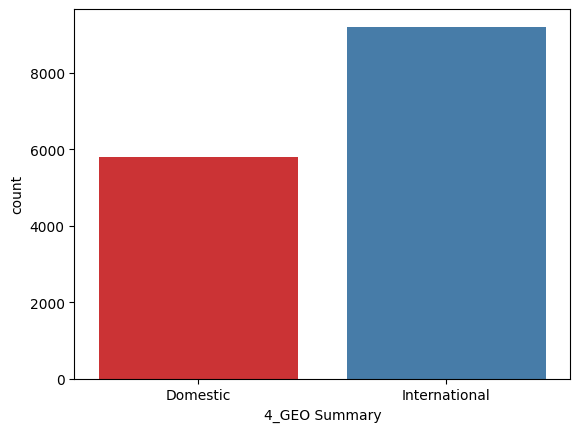

In [ ]:
# GRAFICO Nº DE REGISTROS POR GEO_Summary

df_1['4_GEO Summary'].value_counts()
sns.countplot(data=df_1,x="4_GEO Summary",palette="Set1")
plt.show()

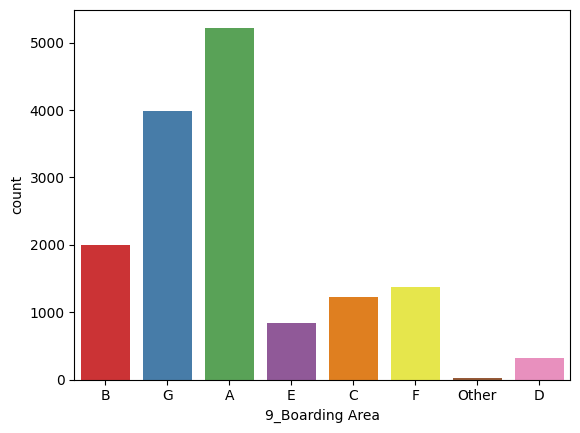

In [ ]:
# GRAFICO NÚMERO DE REGISTROS POR 9_Boarding Area

sns.countplot(data=df_1,x="9_Boarding Area",palette="Set1")
plt.show()

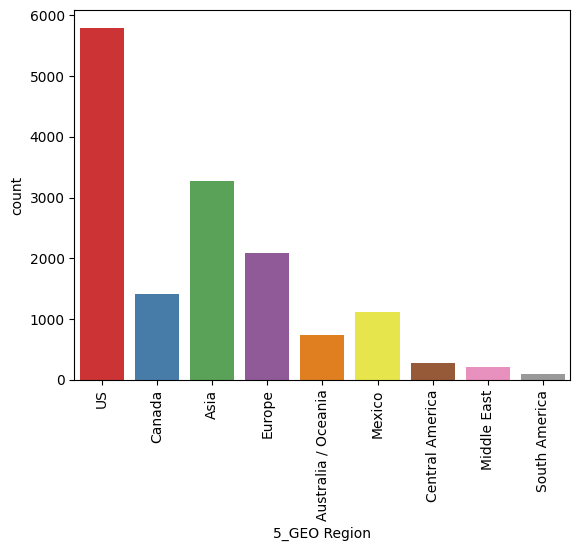

In [ ]:
# GRAFICO NUMERO DE REGISTROS POR 5_Geo_region

sns.countplot(data=df_1,x="5_GEO Region",palette="Set1")
plt.xticks(rotation=90)
plt.show()

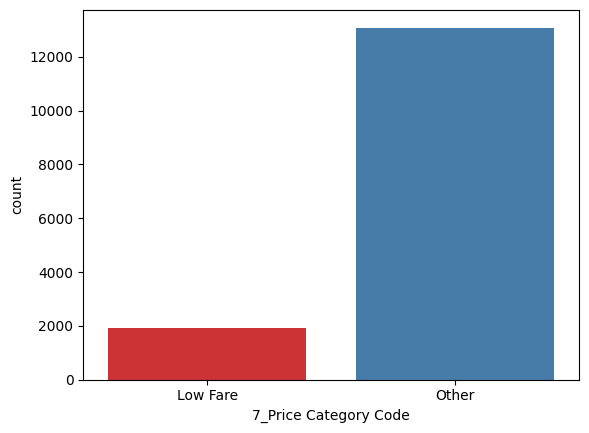

In [ ]:
# GRAFICO NÚMERO DE REGISTROS POR 7_Price Category Code

sns.countplot(data=df_1,x="7_Price Category Code",palette="Set1")
plt.show()

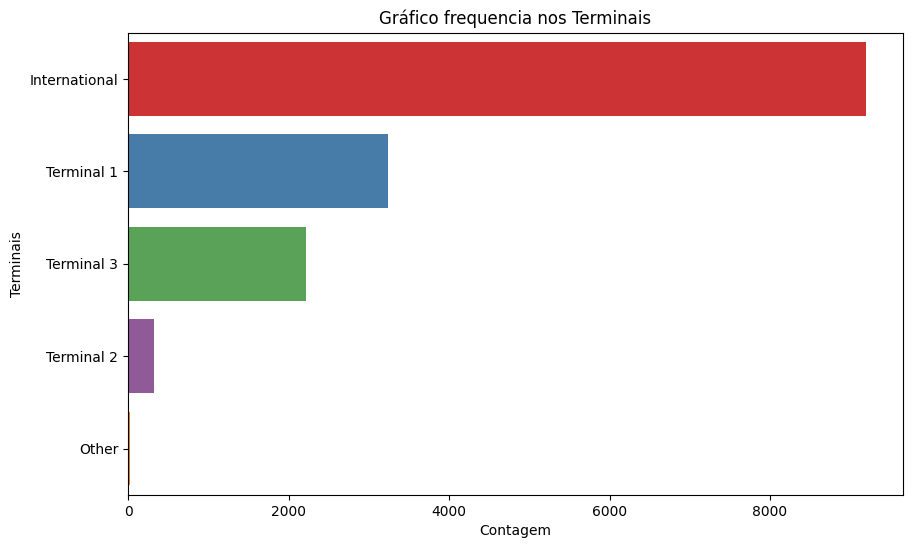

In [ ]:
# GRAFICO NÚMERO DE PASSAGEIROS POR 8_Terminal
terminal_count = df_1['8_Terminal'].value_counts()

plt.figure(figsize=(10, 6))  # Tamanho da figura
sns.barplot(x=terminal_count.values, y=terminal_count.index, palette="Set1")
plt.xlabel("Contagem")  # Adicionando um rótulo ao eixo x
plt.ylabel("Terminais")  # Adicionando um rótulo ao eixo y
plt.title("Gráfico frequencia nos Terminais")

plt.show()


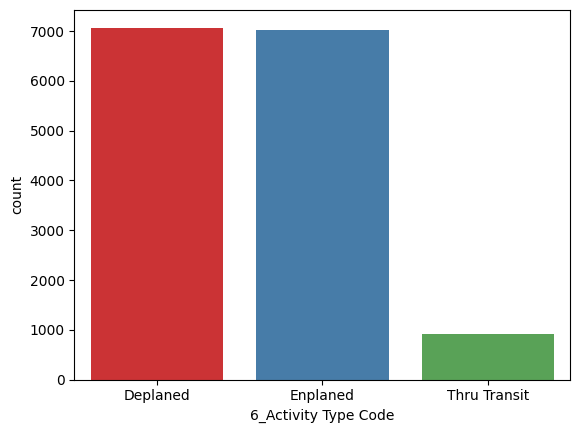

In [ ]:
# GRAFICO NÚMERO DE REGISTROS POR  6_Activity Type Code

sns.countplot(data=df_1,x="6_Activity Type Code",palette="Set1")
plt.show()

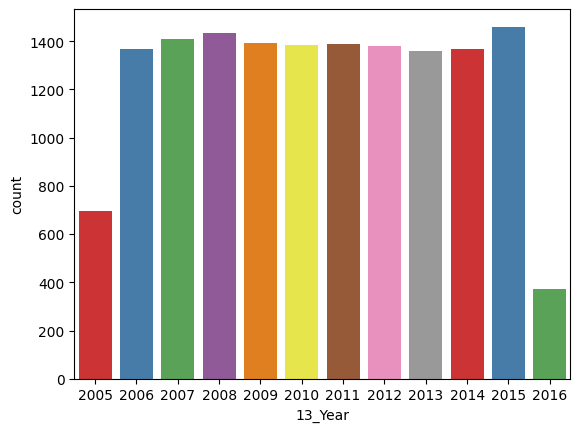

In [ ]:
# GRAFICO NÚMERO DE REGISTROS POR  13_Year

sns.countplot(data=df_1,x="13_Year",palette="Set1")
plt.show()

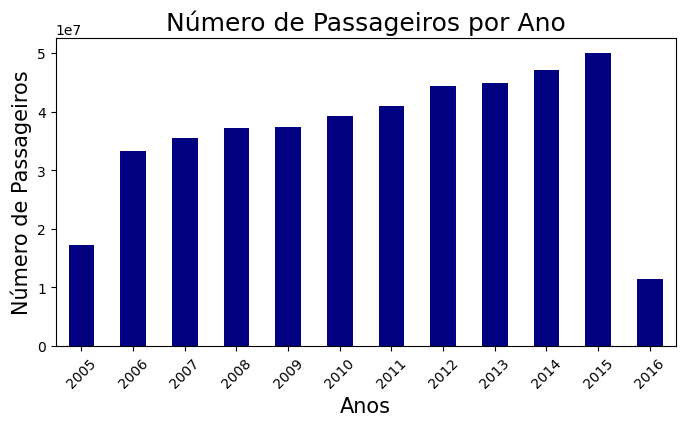

In [ ]:
# GRÁFICO NÚMERO DE PASSAGEIROS POR ANO

passageiros_por_ano = df_1.groupby('13_Year')['10_Passenger Count'].sum()

# Grafico de barras
plt.figure(figsize=(8, 4))  # Tamanho da figura
passageiros_por_ano.plot(kind='bar', color='navy')
plt.xlabel("Anos", fontsize=15)
plt.ylabel("Número de Passageiros", fontsize=15)
plt.title("Número de Passageiros por Ano", fontsize=18)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()


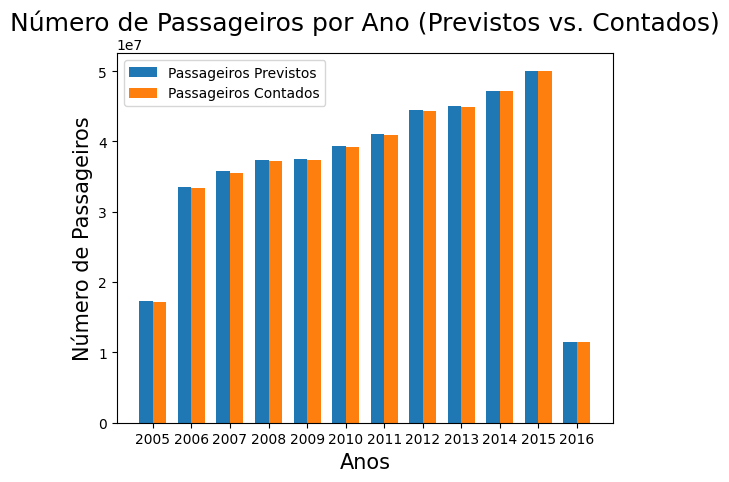

In [ ]:
# GRAFICO COMPARAÇÃO NÚMERO DE PASSAGEIROS CONTADOS E AJUSTADOS POR ANO.

passageiros_por_ano_prev = df_1.groupby(['13_Year'])[['12_Adjusted Passenger Count','10_Passenger Count']].sum()

# Extraindo os anos e os valores das duas colunas
anos = passageiros_por_ano_prev.index
passageiros1 = passageiros_por_ano_prev['12_Adjusted Passenger Count']
passageiros2 = passageiros_por_ano_prev['10_Passenger Count']

largura = 0.35  # Largura das barras

# Cririando barras para os dois conjuntos de dados, com deslocamento para ficarem lado a lado
plt.bar(anos - largura/2, passageiros1, largura, label='Passageiros Previstos')
plt.bar(anos + largura/2, passageiros2, largura, label='Passageiros Contados')

plt.xlabel("Anos", fontsize=15)
plt.ylabel("Número de Passageiros", fontsize=15)
plt.title("Número de Passageiros por Ano (Previstos vs. Contados)", fontsize=18)
plt.xticks(anos)
plt.legend()  # Adiciona uma legenda ao gráfico para distinguir as barras
plt.show()

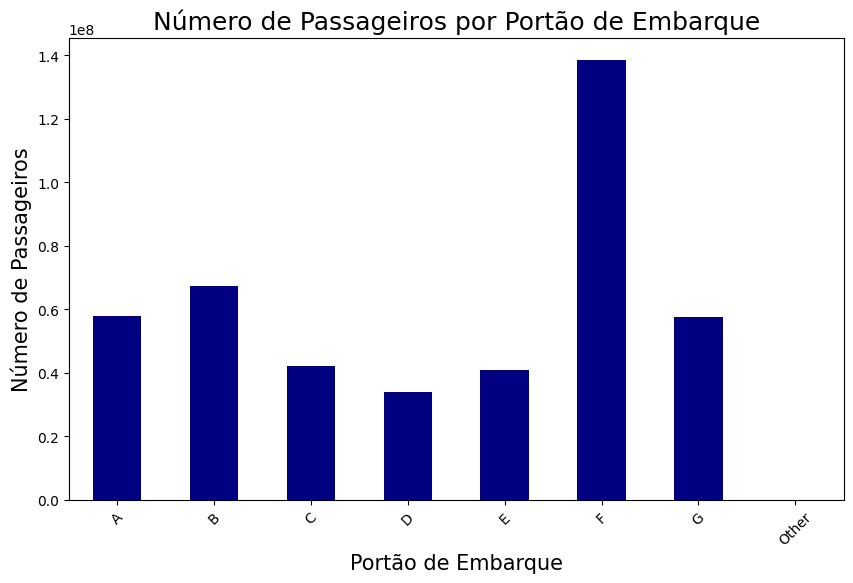

In [ ]:
# NUMERO DE PASSAGEIROS POR PORTÃO DE EMBARQUE

passeng_boarding = df_1.groupby('9_Boarding Area')['10_Passenger Count'].sum()


plt.figure(figsize=(10,6))
passeng_boarding.plot(kind ='bar', color= 'navy')
plt.xlabel('Portão de Embarque',fontsize=15)
plt.ylabel('Número de Passageiros', fontsize=15)
plt.title('Número de Passageiros por Portão de Embarque', fontsize=18)
plt.xticks(rotation=45)
plt.show()

Algo estranho de passa com os anos de 2013 e 2016, os números são muito inferiores aos demais.

In [ ]:
# REGISTROS EM 2016

registros_2016 = df_1[df_1['13_Year'] == 2016]
registros_2016.groupby(['1_Activity Period'])[['1_Activity Period', '10_Passenger Count', '12_Adjusted Passenger Count']].sum()

<ipython-input-36-217caf581813>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  registros_2016.groupby(['1_Activity Period'])[['1_Activity Period', '10_Passenger Count', '12_Adjusted Passenger Count']].sum()


,10_Passenger Count,12_Adjusted Passenger Count
1_Activity Period,,
2016-01,3748529,3749417
2016-02,3543639,3543751
2016-03,4137679,4138030


In [ ]:
#REGISTROS EM 2005

registros_2005 = df_1[df_1['13_Year'] == 2005]
registros_2005.groupby(['1_Activity Period'])[['1_Activity Period', '10_Passenger Count', '12_Adjusted Passenger Count']].sum()

<ipython-input-37-e0349b55b501>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  registros_2005.groupby(['1_Activity Period'])[['1_Activity Period', '10_Passenger Count', '12_Adjusted Passenger Count']].sum()


,10_Passenger Count,12_Adjusted Passenger Count
1_Activity Period,,
2005-07,3225769,3254797
2005-08,3195866,3224118
2005-09,2740553,2764519
2005-10,2770715,2798480
2005-11,2617333,2638631
2005-12,2671797,2696084


# ANALISE DESCRITIVA

3. Utilizando os dataframes de PySpark, prepararemos um notebook para desenvolver os
seguintes pontos:

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=f80ad2215d4eb527e4a31d9efe00566683eacc98788cfc35a3009954259cb3b2
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS
from pyspark.sql import SparkSession
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import col, mean, stddev
from pyspark.sql.functions import col, row_number
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation


In [ ]:
# INICIO DE SESSÃO SPARK
spark = SparkSession.builder.appName("PF_analysis").getOrCreate()

In [ ]:
# 3.1  CARREGAREMOS O ARQUIVO CSV NUM DATAFRAME

df_spark = spark.read.option("Header", True).csv("/content/drive/MyDrive/Air_Traffic_tratado_final.csv")

In [ ]:
# EXIBINDO DATAFRAME
df_spark.show()

+-----------------+-------------------+-------------------+-------------+-------------------+--------------------+---------------------+-------------+---------------+------------------+------------------------------+---------------------------+-------+--------+
|1_Activity Period|2_Operating Airline|3_Published Airline|4_GEO Summary|       5_GEO Region|6_Activity Type Code|7_Price Category Code|   8_Terminal|9_Boarding Area|10_Passenger Count|11_Adjusted Activity Type Code|12_Adjusted Passenger Count|13_Year|14_Month|
+-----------------+-------------------+-------------------+-------------+-------------------+--------------------+---------------------+-------------+---------------+------------------+------------------------------+---------------------------+-------+--------+
|          2005-07|       ATA Airlines|       ATA Airlines|     Domestic|                 US|            Deplaned|             Low Fare|   Terminal 1|              B|             27271|                      Deplane

In [ ]:
df_spark.dtypes

[('1_Activity Period', 'string'),
 ('2_Operating Airline', 'string'),
 ('3_Published Airline', 'string'),
 ('4_GEO Summary', 'string'),
 ('5_GEO Region', 'string'),
 ('6_Activity Type Code', 'string'),
 ('7_Price Category Code', 'string'),
 ('8_Terminal', 'string'),
 ('9_Boarding Area', 'string'),
 ('10_Passenger Count', 'string'),
 ('11_Adjusted Activity Type Code', 'string'),
 ('12_Adjusted Passenger Count', 'string'),
 ('13_Year', 'string'),
 ('14_Month', 'string')]

In [ ]:
df_spark = df_spark.withColumn("10_Passenger Count", col("10_Passenger Count").cast(IntegerType()))
df_spark = df_spark.withColumn("12_Adjusted Passenger Count", col("12_Adjusted Passenger Count").cast(IntegerType()))
df_spark = df_spark.withColumn("13_Year", col("13_Year").cast(IntegerType()))


In [ ]:
# 3.2. QUANTAS COMPANHIAS AEREAS CONSTAM NO FICHEIRO?

df_spark.select(countDistinct("2_Operating Airline")).show()

+-----------------------------------+
|count(DISTINCT 2_Operating Airline)|
+-----------------------------------+
|                                 77|
+-----------------------------------+



In [ ]:
# 3.3. QUANTOS PASSAGEIROS SÃO EM MÉDIA EM CADA VOO DAS COMPANHIAS?

df_spark.groupBy("2_Operating Airline").mean('10_Passenger Count').show()

+--------------------+-----------------------+
| 2_Operating Airline|avg(10_Passenger Count)|
+--------------------+-----------------------+
|          Icelandair|                 2799.7|
|         Ameriflight|                    5.0|
|      Cathay Pacific|     17121.325581395347|
|          Aeromexico|      5463.822222222222|
|      Etihad Airways|      6476.088235294118|
| Philippine Airlines|     10248.635658914729|
|United Airlines -...|      48915.46750232126|
|    Turkish Airlines|      8162.416666666667|
| Swiss International|      6061.640287769784|
|    Independence Air|                 6391.3|
|Miami Air Interna...|                107.375|
|          Air France|     11589.077519379845|
|      Japan Airlines|      6470.332046332046|
|    Midwest Airlines|                 3883.0|
|      Atlas Air, Inc|                   34.0|
|    JetBlue Airways |      35261.13963963964|
|       China Eastern|      5498.402777777777|
|   Mexicana Airlines|      7993.806451612903|
|         Air

In [ ]:
# 3.4. ELIMINAREMOS OS REGISTROS DUPLICADOS PELO CAMPO "REGIAO GEO", MANTENDO APENAS O QUE TIVER
# O MAIOR NÚMERO DE PASSAGEIROS

df_spark.dropDuplicates(['5_GEO Region']).orderBy(['5_GEO Region','10_Passenger Count'], ascending=[True, False]).show()

+-----------------+-------------------+-------------------+-------------+-------------------+--------------------+---------------------+-------------+---------------+------------------+------------------------------+---------------------------+-------+--------+
|1_Activity Period|2_Operating Airline|3_Published Airline|4_GEO Summary|       5_GEO Region|6_Activity Type Code|7_Price Category Code|   8_Terminal|9_Boarding Area|10_Passenger Count|11_Adjusted Activity Type Code|12_Adjusted Passenger Count|13_Year|14_Month|
+-----------------+-------------------+-------------------+-------------+-------------------+--------------------+---------------------+-------------+---------------+------------------+------------------------------+---------------------------+-------+--------+
|          2005-07|          Air China|          Air China|International|               Asia|            Deplaned|                Other|International|              G|              6263|                      Deplane

In [ ]:
# 3.5. COLOCAREMOS OS RESULTADOS DOS DOIS PONTOS ANTERIORES NUM CSV

passenger_mean = df_spark.groupBy("2_Operating Airline").mean('10_Passenger Count')

geo_duplicates_dropped = df_spark.dropDuplicates(['5_GEO Region']).orderBy(['5_GEO Region','10_Passenger Count'], ascending=[True, False])

joined_df = passenger_mean.join(geo_duplicates_dropped, '2_Operating Airline', 'inner')

joined_df.write.mode('overwrite').csv('/content/sample_data/Mean_passenger_1.csv', header=True)


4. Realizaremos uma análise descritiva dos dados, utilizando a linguagem PySpark. Para isso,
teremos de calcular a média e o desvio padrão de cada elemento do conjunto de dados. Os
resultados obtidos deverão ser acompanhados de conclusões, que se basearão nos dados
apresentados e poderão conter uma parte subjetiva, em termos de interpretação dos
mesmos.

In [ ]:
df_spark.describe().show()

+-------+-----------------+-------------------+-------------------+-------------+------------+--------------------+---------------------+-------------+---------------+------------------+------------------------------+---------------------------+-----------------+---------+
|summary|1_Activity Period|2_Operating Airline|3_Published Airline|4_GEO Summary|5_GEO Region|6_Activity Type Code|7_Price Category Code|   8_Terminal|9_Boarding Area|10_Passenger Count|11_Adjusted Activity Type Code|12_Adjusted Passenger Count|          13_Year| 14_Month|
+-------+-----------------+-------------------+-------------------+-------------+------------+--------------------+---------------------+-------------+---------------+------------------+------------------------------+---------------------------+-----------------+---------+
|  count|            15007|              15007|              15007|        15007|       15007|               15007|                15007|        15007|          15007|           

In [ ]:
# MEDIA E DESVIO PADRAO DOS DADOS NUMERICOS

df_spark.select('10_Passenger Count',  '12_Adjusted Passenger Count').describe().show()


+-------+------------------+---------------------------+
|summary|10_Passenger Count|12_Adjusted Passenger Count|
+-------+------------------+---------------------------+
|  count|             15007|                      15007|
|   mean|29240.521090157927|         29331.917105350836|
| stddev|58319.509284123524|           58284.1822186625|
|    min|                 1|                          1|
|    max|            659837|                     659837|
+-------+------------------+---------------------------+



In [ ]:
# MEDIA PASSAGEIROS EM CADA ANO

passenger_year = df_spark.groupBy("13_Year").agg(mean(col("10_Passenger Count")).alias("Average_Passenger_Count"))
passenger_year.show(passenger_year.count(), truncate=False)

+-------+-----------------------+
|13_Year|Average_Passenger_Count|
+-------+-----------------------+
|2007   |25233.55713271824      |
|2015   |34286.22397260274      |
|2006   |24348.407596785975     |
|2013   |33097.02503681885      |
|2014   |34440.51973684211      |
|2012   |32220.526124818578     |
|2009   |26804.696338837042     |
|2016   |30808.212938005392     |
|2005   |24779.903597122302     |
|2010   |28383.224150397687     |
|2011   |29444.45035971223      |
|2008   |25983.72505233775      |
+-------+-----------------------+



In [ ]:
# MÉDIA DE PASSAGEIROS POR MES

passenger_month = df_spark.groupBy("14_Month").agg(mean(col("10_Passenger Count")).alias("Average_Passenger_Count"))
passenger_month.show(passenger_month.count(), truncate=False)

+---------+-----------------------+
|14_Month |Average_Passenger_Count|
+---------+-----------------------+
|July     |32657.033768227167     |
|November |27702.751385589865     |
|February |24258.40796812749      |
|January  |26094.37066246057      |
|March    |29359.807661612133     |
|October  |29645.857915057913     |
|May      |30340.417235494882     |
|August   |32636.380916030535     |
|April    |28813.577893820715     |
|June     |31886.650887573964     |
|December |28723.198570293884     |
|September|28725.348496530456     |
+---------+-----------------------+



In [ ]:
# MÉDIA TOTAL DE PASSAGEIROS e DESVIO PADRAO

df_spark.agg(mean(col("10_Passenger Count")).alias("Average_Passengers")).show()

df_spark.agg(stddev("10_Passenger Count").alias ("Standard Deviation")).show()

+------------------+
|Average_Passengers|
+------------------+
|29240.521090157927|
+------------------+

+------------------+
|Standard Deviation|
+------------------+
|58319.509284123524|
+------------------+



In [ ]:
# MÉDIA TOTAL DE PASSAGEIROS e DESVIO PADRAO (AJUSTADOS)

df_spark.agg(mean(col("12_Adjusted Passenger Count")).alias("Average_Passengers")).show()

df_spark.agg(stddev("10_Passenger Count").alias ("Standard Deviation")).show()


+------------------+
|Average_Passengers|
+------------------+
|29331.917105350836|
+------------------+

+------------------+
|Standard Deviation|
+------------------+
|58319.509284123524|
+------------------+



In [ ]:
# MÉDIA DE PASSAGEIROS POR REGIAO E DESVIO PADRAO

mean_passenger_geo = df_spark.groupBy("5_GEO Region").agg(mean(col("10_Passenger Count")).alias("Average_Passenger_Count"))
mean_passenger_geo.show(mean_passenger_geo.count(), truncate=False)



dp_passenger_geo = df_spark.groupBy("5_GEO Region").agg(stddev(col("10_Passenger Count")).alias("Standard Deviation"))
dp_passenger_geo.show(dp_passenger_geo.count(), truncate=False)

+-------------------+-----------------------+
|5_GEO Region       |Average_Passenger_Count|
+-------------------+-----------------------+
|Europe             |12755.652465294399     |
|Central America    |4946.715328467153      |
|US                 |58330.34345351044      |
|South America      |2786.011111111111      |
|Mexico             |7173.62062780269       |
|Middle East        |8658.61214953271       |
|Canada             |9777.9682651622        |
|Australia / Oceania|6417.016282225238      |
|Asia               |13435.00458295142      |
+-------------------+-----------------------+

+-------------------+------------------+
|5_GEO Region       |Standard Deviation|
+-------------------+------------------+
|Europe             |8634.076411562175 |
|Central America    |1220.8403125914656|
|US                 |84951.31664013123 |
|South America      |396.7586506195526 |
|Mexico             |5336.223001980255 |
|Middle East        |2732.7195183986   |
|Canada             |7833.110588

In [ ]:
# MEDIA DE PASSAGEIROS POR COMPANHIA AEREA E DESVIO PADRAO

mean_pass_op = df_spark.groupBy("2_Operating Airline").agg(mean(col("10_Passenger Count")).alias("Average_Passenger_Count"))
mean_pass_op.show()
dp_pass_op = df_spark.groupBy("2_Operating Airline").agg(stddev(col("10_Passenger Count")).alias("Standard Deviation"))
dp_pass_op.show()

+--------------------+-----------------------+
| 2_Operating Airline|Average_Passenger_Count|
+--------------------+-----------------------+
|          Icelandair|                 2799.7|
|         Ameriflight|                    5.0|
|      Cathay Pacific|     17121.325581395347|
|          Aeromexico|      5463.822222222222|
|      Etihad Airways|      6476.088235294118|
| Philippine Airlines|     10248.635658914729|
|United Airlines -...|      48915.46750232126|
|    Turkish Airlines|      8162.416666666667|
| Swiss International|      6061.640287769784|
|    Independence Air|                 6391.3|
|Miami Air Interna...|                107.375|
|          Air France|     11589.077519379845|
|      Japan Airlines|      6470.332046332046|
|    Midwest Airlines|                 3883.0|
|      Atlas Air, Inc|                   34.0|
|    JetBlue Airways |      35261.13963963964|
|       China Eastern|      5498.402777777777|
|   Mexicana Airlines|      7993.806451612903|
|         Air

In [ ]:
# MAIOR E MENOR MEDIA E DESVIO PADRÃO DE PASSAGEIROS POR COMPANHIA AEREA

min_mean = mean_pass_op.orderBy(col('Average_Passenger_Count')).first()
print(min_mean)

max_mean= mean_pass_op.orderBy(col('Average_Passenger_Count').desc()).first()
print(max_mean)
print('***********************************')

min_dp = dp_pass_op.orderBy(col('Standard Deviation')).first()
print(min_dp)

max_dp= dp_pass_op.orderBy(col('Standard Deviation').desc()).first()
print(max_dp)


Row(2_Operating Airline='Evergreen International Airlines', Average_Passenger_Count=2.0)
Row(2_Operating Airline='American Airlines', Average_Passenger_Count=127164.38970588235)
***********************************
Row(2_Operating Airline='Boeing Company', Standard Deviation=None)
Row(2_Operating Airline='United Airlines', Standard Deviation=111407.6096590275)


In [ ]:
# MEDIA DE PASSAGEIROS POR ANO

passenger_year = df_spark.groupBy("13_Year").agg(mean(col("10_Passenger Count")).alias("Average_Passenger_Count"))
passenger_year.orderBy(col('Average_Passenger_Count')).show()

# Calculo ddo desvio padrao por ano
dp_passenger_year = df_spark.groupBy("13_Year").agg(stddev(col("10_Passenger Count")).alias("Standard Deviation"))
dp_passenger_year.orderBy(col('Standard Deviation')).show()

+-------+-----------------------+
|13_Year|Average_Passenger_Count|
+-------+-----------------------+
|   2006|     24348.407596785975|
|   2005|     24779.903597122302|
|   2007|      25233.55713271824|
|   2008|      25983.72505233775|
|   2009|     26804.696338837042|
|   2010|     28383.224150397687|
|   2011|      29444.45035971223|
|   2016|     30808.212938005392|
|   2012|     32220.526124818578|
|   2013|      33097.02503681885|
|   2015|      34286.22397260274|
|   2014|      34440.51973684211|
+-------+-----------------------+

+-------+------------------+
|13_Year|Standard Deviation|
+-------+------------------+
|   2008|  50774.2273603889|
|   2007|52686.333022728555|
|   2006| 53418.13826968551|
|   2005| 54774.38414321783|
|   2009| 55096.04274953367|
|   2016|56351.917740411474|
|   2010|  57782.3443543718|
|   2011|57938.886803724185|
|   2012|58612.368565066805|
|   2015|62735.130892386165|
|   2014| 63694.36786274649|
|   2013| 69500.20489950952|
+-------+-----------

In [ ]:
# MEDIA DE PASSAGEIROS E DESVIO PADRAO EM DESTINOS ASIATICOS POR ANO

dest_asiatico = df_spark.filter(col('5_GEO Region')=='Asia')

dest_asiatico_media = dest_asiatico.groupBy(col('13_Year')).agg(mean('10_Passenger Count').alias('Average Passenger (Asia)'))
dest_asiatico_media.orderBy(col('Average Passenger (Asia)')).show()

dest_asiatico_desv = dest_asiatico.groupBy(col('13_Year')).agg(stddev('10_Passenger Count').alias('Standard Deviation (Asia)'))
dest_asiatico_desv.orderBy(col('Standard Deviation (Asia)')).show()

+-------+------------------------+
|13_Year|Average Passenger (Asia)|
+-------+------------------------+
|   2009|      12175.326732673268|
|   2005|      13038.213333333333|
|   2011|      13105.382059800664|
|   2006|      13173.433774834437|
|   2013|       13208.41693811075|
|   2008|      13290.556962025317|
|   2010|      13392.646666666667|
|   2016|       13495.02380952381|
|   2012|      13918.128378378378|
|   2007|      14025.833333333334|
|   2015|      14070.201892744479|
|   2014|      14178.016835016835|
+-------+------------------------+

+-------+-------------------------+
|13_Year|Standard Deviation (Asia)|
+-------+-------------------------+
|   2009|       13988.705402452402|
|   2013|       14538.514984111735|
|   2016|       15670.050453918198|
|   2011|       15687.152460645744|
|   2010|       15761.025041846777|
|   2005|        16513.84306655076|
|   2012|       16529.134715745397|
|   2008|       16647.495111255776|
|   2006|        16721.92095998379|
|   201

In [ ]:
# MEDIA DE PASSAGEIROS E DESVIO PADRAO POR MES PARA DESTINOS ASIATICOS

dest_asiatico_media_mensal = dest_asiatico.groupBy(col('14_Month')).agg(mean('10_Passenger Count').alias('Average Passenger (Asia)'))
dest_asiatico_media_mensal.orderBy(col('Average Passenger (Asia)')).show()

dest_asiatico_desv_mensal= dest_asiatico.groupBy(col('14_Month')).agg(stddev('10_Passenger Count').alias('Standard Deviation (Asia)'))
dest_asiatico_desv_mensal.orderBy(col('Standard Deviation (Asia)')).show()

+---------+------------------------+
| 14_Month|Average Passenger (Asia)|
+---------+------------------------+
| February|      11511.985714285714|
| November|       12546.21505376344|
|September|      12733.794223826715|
|    April|      12932.829365079366|
|  October|       13218.65107913669|
| December|      13224.760563380281|
|    March|      13290.774193548386|
|  January|       13645.22695035461|
|      May|      14185.091633466136|
|     June|      14490.141176470588|
|     July|      14723.654676258993|
|   August|       14846.65107913669|
+---------+------------------------+

+---------+-------------------------+
| 14_Month|Standard Deviation (Asia)|
+---------+-------------------------+
| February|       13281.969820055709|
| November|        14823.83648012743|
|  January|        15411.80484296713|
|    April|       15615.634845377062|
| December|       15631.545379102281|
|    March|       15979.069938400984|
|September|       16108.980167846828|
|  October|        16632.86

# ANALISE DE CORRELAÇÃO

5. Posteriormente, realizaremos uma análise de correlação, cujo resultado deverá ser uma
matriz de correlação de dados, que represente a forma como as diferentes variáveis estão
relacionadas. Para realizar a matriz de correlação, é necessário configurar as
características ou colunas, com os tipos necessários e assim poder realizar o seu cálculo.
Estas transformações terão de ser refletidas no documento final. Não é necessário
comentar cada um dos cruzamentos de relações de dados, mas teremos de escolher os
10 elementos mais importantes e justificar os resultados obtidos. Estas conclusões terão
de ser baseadas nos dados apresentados e podem conter uma parte subjetiva, em termos
de interpretação dos mesmos.
Selecionaremos, então, um dos algoritmos que vimos durante o curso e explicaremos as
razões da nossa escolha. Aplicaremos esse algoritmo com os argumentos e valores que
considerarmos, e explicaremos os resultados obtidos. É possível que tenhamos de alterar
os tipos de alguma das colunas


In [ ]:
# DATAFRAME A SER USADO

df_1.info()

# TRANSFORMAR DF_1 PARA DATAFRAME SPARK

df_spark = spark.createDataFrame(df_1)
df_spark.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype    
---  ------                          --------------  -----    
 0   1_Activity Period               15007 non-null  period[M]
 1   2_Operating Airline             15007 non-null  object   
 2   3_Published Airline             15007 non-null  object   
 3   4_GEO Summary                   15007 non-null  object   
 4   5_GEO Region                    15007 non-null  object   
 5   6_Activity Type Code            15007 non-null  object   
 6   7_Price Category Code           15007 non-null  object   
 7   8_Terminal                      15007 non-null  object   
 8   9_Boarding Area                 15007 non-null  object   
 9   10_Passenger Count              15007 non-null  int64    
 10  11_Adjusted Activity Type Code  15007 non-null  object   
 11  12_Adjusted Passenger Count     15007 non-null  int64    
 12  13_Y

- Opção 2:

1.   Eliminar todas colunas categóricas não binárias,
2. Transformar  4_Geo Summary e 7_Price Category Code para binário

In [ ]:
# TRANSFORMAR A COLUNA 4_GEO Summary E 7_Price Category PARA NUMERICO

inputCols = ['4_GEO Summary','7_Price Category Code']
outputCols = ['4_GEO Summary Index','7_Price Category Code Index' ]

# CRIAR E APLICAR O STRINGINDEXER

indexer = StringIndexer(inputCols=inputCols, outputCols=outputCols)
df_spark= indexer.fit(df_spark).transform(df_spark)
df_spark.show()

+-----------------+-------------------+-------------------+-------------+-------------------+--------------------+---------------------+-------------+---------------+------------------+------------------------------+---------------------------+-------+--------+-------------------+---------------------------+
|1_Activity Period|2_Operating Airline|3_Published Airline|4_GEO Summary|       5_GEO Region|6_Activity Type Code|7_Price Category Code|   8_Terminal|9_Boarding Area|10_Passenger Count|11_Adjusted Activity Type Code|12_Adjusted Passenger Count|13_Year|14_Month|4_GEO Summary Index|7_Price Category Code Index|
+-----------------+-------------------+-------------------+-------------+-------------------+--------------------+---------------------+-------------+---------------+------------------+------------------------------+---------------------------+-------+--------+-------------------+---------------------------+
|               {}|       ATA Airlines|       ATA Airlines|     Domest

In [ ]:
# CRIAR COPIA DO DATAFRAME

df_pandas = df_spark.toPandas().copy()

In [ ]:
# FAZER CORRELAÇÃO ENTRE AS COLUNAS 10_Passenger Count, 12_Adjusted Passenger Count, 3_Year, 4_GEO Summary Index e 7_Price Category Code Index

# Definindo as colunas de entrada

inputCols_corr = ['10_Passenger Count', '12_Adjusted Passenger Count', '13_Year', '4_GEO Summary Index', '7_Price Category Code Index']

# Vetor de característica

assembler = VectorAssembler(inputCols = inputCols_corr, outputCol = 'features')

# Aplicar o vetor de característica ao Dataframe

df_spark = assembler.transform(df_spark)

# Calcular Matriz de Correlaçao

df_corr = Correlation.corr(df_spark, 'features').head()
correlation = df_corr[0].toArray()

# Exibir correlação

print(correlation)

[[ 1.          0.99994089  0.06006904  0.39574325  0.06504714]
 [ 0.99994089  1.          0.05909623  0.3968562   0.06466124]
 [ 0.06006904  0.05909623  1.         -0.06604618  0.00568296]
 [ 0.39574325  0.3968562  -0.06604618  1.          0.41149848]
 [ 0.06504714  0.06466124  0.00568296  0.41149848  1.        ]]


## TESTE DE HIPOTÉSE

**TESTE 1 -**

Verificar se a média do número de passageiros muda de acordo com valor da tarifa:

Low Fare = 1.0

Other = 0.0

**Hipótese nula** = Não há mudanças estatisticamente significativas

**Hipótese Alternativa** = Há mudanças estatisticamente significativas

In [ ]:
from scipy import stats

#SEPARAR OS DADOS EM 2 GRUPOS DE ACORDO COM A TARIFA

low_fare = df_pandas[df_pandas['7_Price Category Code Index'] == 1.0]['10_Passenger Count']
other_fare = df_pandas[df_pandas['7_Price Category Code Index'] == 0.0]['10_Passenger Count']

# REALIZAR O TESTE T DE STUDENT PARA AS VARIAVEIS

t_statistic, p_value = stats.ttest_ind(low_fare, other_fare)

# VARIFICAR O VALOR P_VALUE
if p_value < 0.05:
    print(f"Há evidências estatísticas de que o tipo de tarifa influencia o número de passageiros.(p_value = {p_value})")
else:
    print(f"Não há evidências estatísticas de que o tipo de tarifa influencia o número de passageiros.(p_value = {p_value})")

Há evidências estatísticas de que o tipo de tarifa influencia o número de passageiros.(p_value = 1.5083748719513188e-15)


In [ ]:
# CALCULAR A MÉDIA DE CADA PARTE

media_low_fare = low_fare.mean()
media_other_fare = other_fare.mean()

print(f" Média de passageiros com bilhetes Low Fare: {media_low_fare}")
print(f" Média de passageiros com bilhetes Other Fare: {media_other_fare}")

 Média de passageiros com bilhetes Low Fare: 39144.21041666667
 Média de passageiros com bilhetes Other Fare: 27787.546114464734


**TESTE 2 -**

Verificar se a média do número de passageiros muda de acordo com o tipo de viagem (Internacional ou Doméstico)

Internacional = 0.0

Doméstico = 1.0

**Hipótese nula** = Não há mudanças estatisticamente significativas

**Hipótese Alternativa** = Há mudanças estatisticamente significativas

In [ ]:
#SEPARAR OS DADOS EM 2 GRUPOS DE ACORDO COM A GEO SUMMARY

international = df_pandas[df_pandas['4_GEO Summary Index'] == 1.0]['10_Passenger Count']
domestic = df_pandas[df_pandas['4_GEO Summary Index'] == 0.0]['10_Passenger Count']

# REALIZAR O TESTE T DE STUDENT PARA AS VARIAVEIS

t_statistic_1, p_value_1 = stats.ttest_ind(international, domestic)

# VARIFICAR O VALOR P_VALUE
if p_value < 0.05:
    print(f"Há evidências estatísticas de que o tipo de voo (Internacional/Doméstico) influencia o número de passageiros.(p_value = {p_value_1})")
else:
    print(f"Não há evidências estatísticas de que o tipo de voo (Internacional/Doméstico) influencia o número de passageiros.(p_value = {p_value_1})")

Há evidências estatísticas de que o tipo de voo (Internacional/Doméstico) influencia o número de passageiros.(p_value = 0.0)


In [ ]:
# CALCULAR A MÉDIA DE CADA PARTE

media_international = international.mean()
media_domestic = domestic.mean()

print(f" Média de passageiros com bilhetes Internacionais: {media_international}")
print(f" Média de passageiros com bilhetes Domésticos: {media_domestic}")

 Média de passageiros com bilhetes Internacionais: 58330.34345351044
 Média de passageiros com bilhetes Domésticos: 10930.673072747015
